# Defining Mesh

Firstly, out mesh will be rectangular in shape with an x-dimension length of $L_x$ metres and a y-dimension length of $L_y$ metres. 


*** define structured mesh ***

This spatial domain is divided into computational cells with x-dimensions of $dx$ metres y-dimensions of $dy$ metres

The number of cell in the x-direction = $n_x$

The number of cell in the y-direction = $n_y$


<img src="./Paper_Images/Mesh.jpg" alt="Drawing" style="width: 600px;"/> 

In [1]:
Lx = 2 #width of domain
Ly = .1 #height of domain

fac = 1

nx = 50      #number of control volumes in the x-direction
ny = 4    #number of control volumes in the y-direction

In [2]:
# # Defining these values:

# Lx = 1 #width of domain
# Ly = 1 #height of domain

# # This can be changed later
# nx = 4    #number of cells in the x-direction
# ny = 4    #number of cells in the y-direction

dy = Ly/ny          #length of each control volume in the y-direction
dx = Lx/nx          #length of each control volume in the x-direction

### Indexing convention

Next we'll determine an indexing convention that will assign an ID number to each cell and boundary face, marked below:

<img src="./Paper_Images/MeshWithPoints.jpg" alt="Drawing" style="width: 600px;"/> 

In [3]:
import numpy as np

The following functions visualises the mesh and the point IDs. Feel free to play around with Lx, Ly, nx and ny values:

In [30]:
import matplotlib.pyplot as plt

def visualiseMesh(Lx, Ly, nx, ny):

    dy = Ly/ny
    dx = Lx/nx
    x = np.zeros((1,nx+2))   #position vector defining the center points of the control volumes in the x-direction.
    x[0,nx+1] = Lx
    x[0,1:nx+1] = np.arange(dx/2,Lx,dx)

    y = np.zeros((1,ny+2))   #position vector defining the center points of the control volumes in the y-direction.
    y[0,ny+1] = Ly
    y[0,1:ny+1] = np.arange(dy/2,Ly,dy)


    dispx, dispy = np.meshgrid(x, y)

    labels = np.arange(0,len(dispx[0,:])*len(dispy),1)

    plt.figure(figsize=(10*(Lx/Ly), 10))
    plt.xticks(np.arange(0, Lx+1, Lx/nx))
    plt.yticks(np.arange(0, Ly+1, Ly/ny))
    plt.xlim(0, Lx)
    plt.ylim(0, Ly)
    plt.xlabel("x (m)")
    plt.xlabel("y (m)")

    plt.rc('grid', linestyle="--", color='black')
    plt.grid(True)
    plt.rc('grid', linestyle="--", color='black')
    plt.scatter(dispx, dispy, s = 6)

    dispx_new = dispx.reshape(len(dispx[0,:])*len(dispy), 1)
    dispy_new = dispy.reshape(len(dispx[0,:])*len(dispy), 1)

    for i in labels:
        plt.annotate(str(i), xy=(dispx_new[i][0],dispy_new[i][0]))

    # plt.annotate(str(0), xy=(dispx_new[0][0],dispy_new[0][0]))

    plt.show()

In [31]:
# visualiseMesh(Lx, Ly, nx, ny)

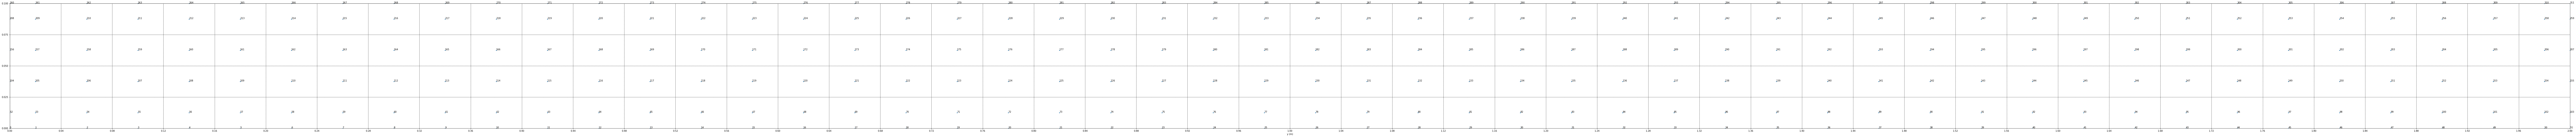

In [32]:
# Example with different values

# Lx, Ly, nx, ny = 10, 5, 10, 10

visualiseMesh(Lx, Ly, nx, ny)

### Displacement Fields

Each point on the above mesh is a point in the displacment field $\boldsymbol{u} (x,y)$. The $\boldsymbol{u}$ field can be thought as the change in displacement from it's original position, not the the coordinates x and y. Therefore we can initialise the $\boldsymbol{u}$ field to be equal to zero for all points in all directions. 

As our mesh is 2D the $\boldsymbol{u} (x,y)$ is made up of change of displacment in the x-direction $u$ and in the y-direction $v$. 

In [ ]:
# initialising u field: 

def initaliseUfield (nx, ny):    
    
    # create an zero array for the u and v values for each point
    U = np.zeros([(ny+2)*(nx+2),2])

    return U


U = initaliseUfield(nx, ny)

For clarity when coding, we will refer to:

- <code>U</code> as the displacement field $\boldsymbol{u}$
- <code>u</code> as displacement vector in the x-direction $u$
- <code>v</code> as displacement vector in the y-direction $v$

In [ ]:
# the shape of U:
print(U.shape)

#This value is the number of points in the mesh
print("Number of points in Mesh: " + str(U.shape[0]))

# This is the number of dmension, i.e x & y 
print("Number of dimensions: " + str(U.shape[1]))

(144, 2)
Number of points in Mesh: 144
Number of dimensions: 2
